In [16]:
import numpy as np

import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import pandas as pd
from pandas.io.json import json_normalize


import seaborn as sns





In [17]:
HatchData = pd.read_csv('HatchData.csv')
HatchData.head()

,Bulb_Data,Fan_Data,Humidity_Data,Temperature_Data,Valve_Data,Message_Temp,Message_Humid
0,1,1,83.8,28.5,0,Too cold,Well
1,1,1,86.0,29.9,0,Too cold,Well
2,1,1,82.1,30.9,0,Too cold,Well
3,1,1,77.6,31.5,0,Too cold,Well
4,1,1,73.9,31.9,0,Too cold,Well


In [18]:
HatchData_relation = HatchData.corr()
HatchData_relation

C:\Users\oscar\AppData\Local\Temp\ipykernel_18272\3024150324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HatchData_relation = HatchData.corr()


,Bulb_Data,Fan_Data,Humidity_Data,Temperature_Data,Valve_Data
Bulb_Data,1.000000,0.441171,-0.210490,0.180401,0.462962
Fan_Data,0.441171,1.000000,-0.212271,0.189981,0.401590
Humidity_Data,-0.210490,-0.212271,1.000000,-0.934201,-0.360672
Temperature_Data,0.180401,0.189981,-0.934201,1.000000,0.319248
Valve_Data,0.462962,0.401590,-0.360672,0.319248,1.000000


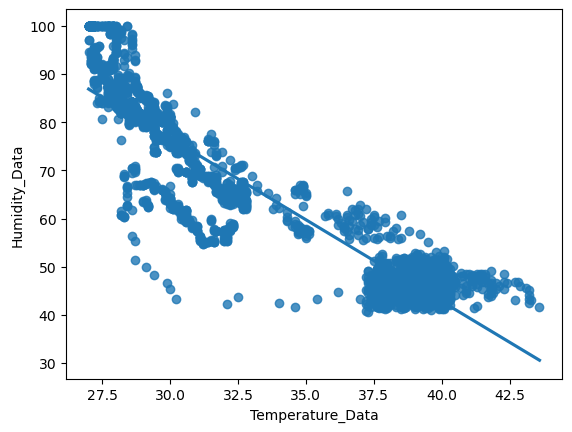

In [19]:
#Draw a regplot to display the correlation between 'tips' and 'bill_amount' and store that regplot object into a variable named: 'tip_plot'.
ax = sns.regplot(x='Temperature_Data', y='Humidity_Data',data=HatchData)

In [20]:
#Define input output data
# Model 1, y = a + b1x1 + b2x2+ ....
y = HatchData['Humidity_Data'].values
x = HatchData[['Valve_Data','Temperature_Data']].values


#Split the model into train and test data and assign as 'X_train,X_test,y_train and y_test'. The test size should be '0.3' and random state should be '0'
# Split test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                  random_state=100)

In [21]:
#Build an appropriate predictive model and name it as 'model'.
# Regression model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:

model.coef_, model.intercept_

(array([-2.48372485, -3.31774266]), 177.16957078907907)

In [23]:
#Make predictions on test dataset and assign as 'y_pred'.

y_pred = model.predict(x_test)
pd.DataFrame({'Actual Y': y_test, 
              'Predicted Y': y_pred})


,Actual Y,Predicted Y
0,45.8,41.976139
1,51.2,41.976139
2,45.6,47.616302
3,47.7,47.616302
4,56.1,71.504049
...,...,...
717,80.5,75.153566
718,79.8,82.613905
719,45.8,49.606948
720,47.6,41.644365


In [24]:
#Identify the accuracy, coefficients, intercept value and Mean Squared Error of the model and store those values into the variables: 'score','coef','intercept' and 'mse' respectively.
# Model Evaluation
# MSE 
# R Square Value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R Squared:", r2_value)

MSE: 35.16319323088767
R Squared: 0.8835793286198237


In [25]:
# Importing required libraries
import requests

# Getting real-time temperature and humidity data from API
response = requests.get("https://eggincubator-825e1-default-rtdb.firebaseio.com/.json")
data = response.json()

# Extracting real-time temperature and humidity values
temp = data['Temperature']
vav = data['ValveStatus']
day = data['Day']
humid = data['Humidity']
linear_predict = print(model.predict([[vav,temp]])) 
 


[55.74018939]


In [26]:
def checkSuccess():
    linear_predict = model.predict([[vav,temp]])
    if  linear_predict > humid:
        return f'''The Humidity is likely to be increase'''
    else:
        return f'''The Humidity is likely to be decrease'''
        
# print (dataset['Valve_Data'])

In [27]:
checkSuccess()

'The Humidity is likely to be increase'